**Dealing with missing data**

In [31]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

A     B     C    D
0  1.0   2.0   3.0  4.0
1  5.0   6.0   NaN  8.0
2  0.0  11.0  12.0  NaN

Number of missing values per column

In [32]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

**Accessing the underlying Numpy array of the DataFrame**

In [33]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [  0.,  11.,  12.,  nan]])

**Removing rows that have some missing data**

In [34]:
df.dropna()

A    B    C    D
0  1.0  2.0  3.0  4.0

**Removing columns that have some missing data**

In [35]:
df.dropna(axis=1)

A     B
0  1.0   2.0
1  5.0   6.0
2  0.0  11.0

**Drop rows where NaN appears in specific columns**

In [36]:
df.dropna(subset=['C'])

A     B     C    D
0  1.0   2.0   3.0  4.0
2  0.0  11.0  12.0  NaN

**Mean Imputation** (Replace the missing value by the mean value of the entire feature column)

In [37]:
from sklearn.preprocessing import Imputer
imr = Imputer(
    missing_values='NaN', strategy='mean',
    axis=0)  # alternatives - 'most frequent' or 'median'
imr = imr.fit(df)
imputed_data = imr.transform(df)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

**Handling Categorical Data**
- _Ordinal_ (can be sorted)
- _Nomimal_

In [38]:
import pandas as pd
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
])
df.columns = ['color', 'size', 'price', 'classlabel']
df

color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1

**Mapping Ordinal Features**

In [39]:
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1
}
df['size'] = df['size'].map(size_mapping)
df

color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1

**Encoding Class Labels**

In [40]:
import numpy as np
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
df['classlabel'] = df['classlabel'].map(class_mapping)
print(df)
print("========================")

inv_class_mapping = {idx:label for label, idx in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
print(df)

   color  size  price  classlabel
0  green     1   10.1           0
1    red     2   13.5           1
2   blue     3   15.3           0
   color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1


**`LabelEncoder` for encoding class labels**

In [41]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'])
print(y)
class_le.inverse_transform(y)

[0 1 0]


array(['class1', 'class2', 'class1'], dtype=object)

**One-Hot Encoding** (using `pd.get_dummies`)

In [42]:
X = df[['color', 'size', 'price']]
pd.get_dummies(X)

size  price  color_blue  color_green  color_red
0     1   10.1           0            1          0
1     2   13.5           0            0          1
2     3   15.3           1            0          0

**Partitioning** a dataset in training and test sets

In [43]:
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None)
df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]
df_wine.head()

Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [44]:
print("Class Labels:", np.unique(df_wine["Class label"]))

Class Labels: [1 2 3]


In [45]:
from sklearn.cross_validation import train_test_split
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Feature Scaling**
- **Normalization**
- **Standardization**

In [46]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm= mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

# StandardScaler
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

**Selecting meaningful features**
- **Sparse solutions with L1 regularization**

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print("Training accuracy:", lr.score(X_train_std, y_train))
print("Test accuracy:", lr.score(X_test_std, y_test))

Training accuracy: 0.983870967742
Test accuracy: 0.981481481481


In [48]:
lr.intercept_

array([-0.38369654, -0.15809809, -0.70034932])

In [49]:
lr.coef_

array([[ 0.28003423,  0.        ,  0.        , -0.02790836,  0.        ,
         0.        ,  0.7099352 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.2366976 ],
       [-0.64391793, -0.06883252, -0.05719652,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92691967,
         0.06005627,  0.        , -0.37101053],
       [ 0.        ,  0.06145372,  0.        ,  0.        ,  0.        ,
         0.        , -0.63707467,  0.        ,  0.        ,  0.49850025,
        -0.35801009, -0.57030594,  0.        ]])

Regularization Path

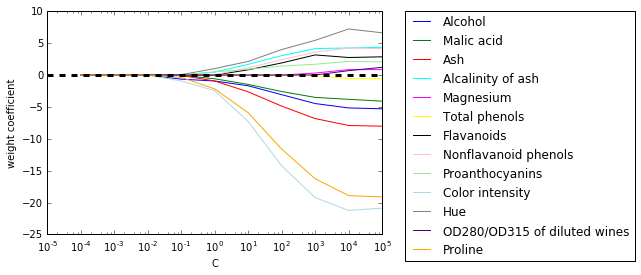

In [50]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink',
    'lightgreen', 'lightblue', 'gray', 'indigo', 'orange'
]

weights = []
params = []

for c in range(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
for col, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, col], label=df_wine.columns[col+1], color=color)
    
plt.axhline(y=0, color='black', linestyle='--', linewidth=3)
plt.xlim(10**(-5), 10**5)
plt.xlabel("C")
plt.xscale('log')
plt.ylabel("weight coefficient")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1.03))
plt.show()

**Sequential Backward Selection (SBS)**

In [75]:
from sklearn.base import clone
import numpy as np
from itertools import combinations
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score


class SBS:
    def __init__(self, estimator, k_features, test_size=0.25, random_state=1):
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state)

        self.n_features_ = X_train.shape[1]
        n_features = self.n_features_
        self.indices_ = tuple(range(n_features))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test,
                                 self.indices_)
        self.scores_ = [score]

        while n_features > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=n_features-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best_idx = np.argmax(scores)
            self.indices_ = subsets[best_idx]
            self.subsets_.append(subsets[best_idx])
            self.scores_.append(scores[best_idx])
            
            n_features -= 1
            
        return self
    
    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = accuracy_score(y_test, y_pred)
        return score

**SBS with KNN**

In [76]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

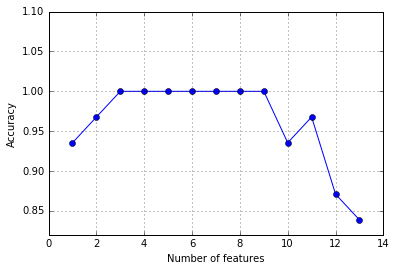

In [77]:
features = range(sbs.k_features, sbs.n_features_+1)
plt.plot(features, sbs.scores_, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.ylim(ymax=1.1)
plt.grid()
plt.show()

**features that yielded good performance**

In [90]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


**Evaluating the performance impact of SBS with KNN**

In [91]:
# using all the features
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

# using the most useful 5 features (obtained using SBS)
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy (using SBS reduction):', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy (using SBS reduciton):', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.983870967742
Test accuracy: 0.944444444444
Training accuracy (using SBS reduction): 0.959677419355
Test accuracy (using SBS reduciton): 0.962962962963


**Assession feature importance with Random Forests**

In [98]:
from sklearn.ensemble import RandomForestClassifier
labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# for f in range(X_train.shape[1]):
#     print(labels[f], indices[f])

In [106]:
print("\n".join(str(x) for x in enumerate(labels)))

(0, 'Alcohol')
(1, 'Malic acid')
(2, 'Ash')
(3, 'Alcalinity of ash')
(4, 'Magnesium')
(5, 'Total phenols')
(6, 'Flavanoids')
(7, 'Nonflavanoid phenols')
(8, 'Proanthocyanins')
(9, 'Color intensity')
(10, 'Hue')
(11, 'OD280/OD315 of diluted wines')
(12, 'Proline')


In [107]:
print("\n".join(str(x) for x in enumerate(importances)))

(0, 0.10350869805541954)
(1, 0.023645330058746833)
(2, 0.012751794782973688)
(3, 0.032479858085605502)
(4, 0.022201044716455318)
(5, 0.059529548149405032)
(6, 0.14906568592750841)
(7, 0.015876535089095676)
(8, 0.021967321466604198)
(9, 0.19058337730562139)
(10, 0.071930824898097045)
(11, 0.13721403886511893)
(12, 0.15924594259934877)


In [102]:
indices

array([ 9, 12,  6, 11,  0, 10,  5,  3,  1,  4,  8,  7,  2], dtype=int64)

In [108]:
importances[indices]

array([ 0.19058338,  0.15924594,  0.14906569,  0.13721404,  0.1035087 ,
        0.07193082,  0.05952955,  0.03247986,  0.02364533,  0.02220104,
        0.02196732,  0.01587654,  0.01275179])

In [113]:
for f in range(X_train.shape[1]):
    print(f, indices[f], labels[indices[f]], importances[indices[f]])

0 9 Color intensity 0.190583377306
1 12 Proline 0.159245942599
2 6 Flavanoids 0.149065685928
3 11 OD280/OD315 of diluted wines 0.137214038865
4 0 Alcohol 0.103508698055
5 10 Hue 0.0719308248981
6 5 Total phenols 0.0595295481494
7 3 Alcalinity of ash 0.0324798580856
8 1 Malic acid 0.0236453300587
9 4 Magnesium 0.0222010447165
10 8 Proanthocyanins 0.0219673214666
11 7 Nonflavanoid phenols 0.0158765350891
12 2 Ash 0.012751794783
